# Scatter Plot will be used for numerical vs numerical variables

In [11]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline



In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [3]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a _scatter plot_ to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

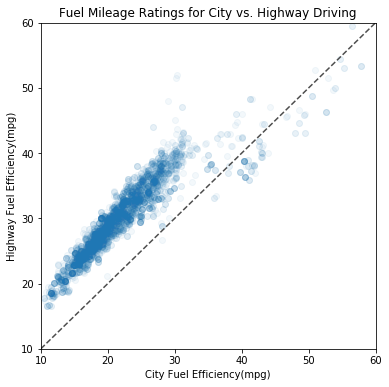

In [4]:
# Method 1: 
# scatter plot with diagonal line 

f, ax = plt.subplots(figsize=(6, 6))

# if you specify the data source, you can directly use the column name , 
# do not need to include df

ax.scatter(data = fuel_econ ,x='city', y='highway', alpha=1/20 ) # alpha is to add transparency to the plot
ax.set(xlim=(10, 60), ylim=(10, 60))

# Plot your initial diagonal line based on the starting
# xlims and ylims.
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)

plt.xlabel('City Fuel Efficiency(mpg)')
plt.ylabel('Highway Fuel Efficiency(mpg)')
plt.title('Fuel Mileage Ratings for City vs. Highway Driving')
plt.show()

#Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. 
#Some transparency is added via 'alpha' to show the concentration of data. Interestingly, 
#for most cars highway mileage is clearly higher than city mileage, but for those cars with
# city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 
# 45 mpg city have better city mileage than highway mileage, contrary to the main trend. 

# It might be good to call out this trend by adding a diagonal line to the figure using the `plot` function. 

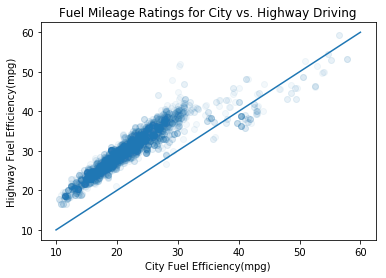

In [5]:
# method 2 with seaborn 
plt.scatter(data = fuel_econ ,x='city', y='highway', alpha=1/20 )
plt.plot([10,60],[10,60]) # diagonal line from (10,10) to (60,60)

plt.xlabel('City Fuel Efficiency(mpg)')
plt.ylabel('Highway Fuel Efficiency(mpg)') 
plt.title('Fuel Mileage Ratings for City vs. Highway Driving')
plt.show()

**Task 2**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

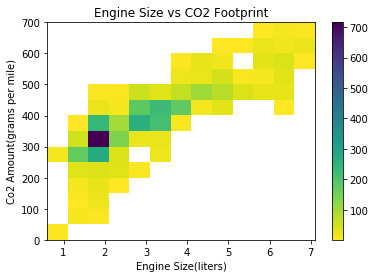

In [9]:
#plt.scatter(data = fuel_econ ,x='displ', y='co2', alpha = 1/3)
#plt.xlabel('Engine Size(liters)')
#plt.ylabel('Co2 Amount(grams per mile)') 
#plt.title('Engine Size vs CO2 Footprint')
# plt.show()
# as we can see, the data points have amny overlapping. It is hard to see any patterns even after
# transparency.

# let's try heat map 
# a color map that goes from light to dark and any cells without count don't get colored in
bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.5, 0.5)
bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
plt.hist2d( data = fuel_econ , x='displ', y='co2', cmap = 'viridis_r',bins=[bins_x , bins_y], cmin=0.5 )
# "cmin" parameter specifies the minimum value in a cell before it will be plotted
#  cell will only get colored if it contains at least one point.

plt.colorbar()
plt.xlabel('Engine Size(liters)')
plt.ylabel('Co2 Amount(grams per mile)') 
plt.title('Engine Size vs CO2 Footprint')
plt.show();



any cells without count don't get colored in. The visualization shows that most cars fall in a line where 
larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the 
lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).